In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import datetime

In [2]:
df = pd.read_csv('../borough_dataset.csv')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [3]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-10-12,0:45,BROOKLYN,11239.0,NaN,NaN,NaN,NaN,NaN,410 GATEWAY DRIVE,...,NaN,NaN,NaN,NaN,4356870,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2020-10-11,19:20,BRONX,10451.0,NaN,NaN,NaN,EXTERIOR STREET,EAST 138 STREET,NaN,...,NaN,NaN,NaN,NaN,4356796,Sedan,NaN,NaN,NaN,NaN
2,2020-10-05,15:43,BRONX,10464.0,NaN,NaN,NaN,ORCHARD BEACH ROAD,BARTOW CIRCLE,NaN,...,NaN,NaN,NaN,NaN,4355237,Sedan,Sedan,NaN,NaN,NaN
3,2020-10-05,17:00,BROOKLYN,11233.0,40.672790,-73.922226,"(40.67279, -73.922226)",PROSPECT PLACE,RALPH AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4355008,Sedan,Sedan,NaN,NaN,NaN
4,2020-10-01,14:35,MANHATTAN,10018.0,NaN,NaN,NaN,12 AVENUE,WEST 40 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4353617,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682809,2015-10-02,16:10,MANHATTAN,10001.0,40.757021,-74.004927,"(40.7570213, -74.004927)",JOE DIMAGGIO HIGHWAY,WEST 34 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3307903,BUS,TAXI,NaN,NaN,NaN
682810,2015-10-04,20:11,BRONX,10469.0,40.869761,-73.844877,"(40.8697608, -73.8448773)",EAST GUN HILL ROAD,KNAPP STREET,NaN,...,Unspecified,NaN,NaN,NaN,3309209,OTHER,BICYCLE,NaN,NaN,NaN
682811,2015-10-01,14:10,MANHATTAN,10029.0,40.787119,-73.947923,"(40.7871194, -73.9479233)",EAST 99 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3306611,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
682812,2015-10-04,17:20,QUEENS,11101.0,40.754341,-73.936009,"(40.7543412, -73.936009)",39 AVENUE,27 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3309602,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [4]:
# Injuries 
df['BOROUGH'].unique()[1]

'BRONX'

In [5]:
# Create groups of boroughs
groups = df.groupby(by='BOROUGH')

In [6]:
# Extract the names to look up groups
keys = []
for g in groups:
    keys.append(g[0])

In [7]:
keys

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

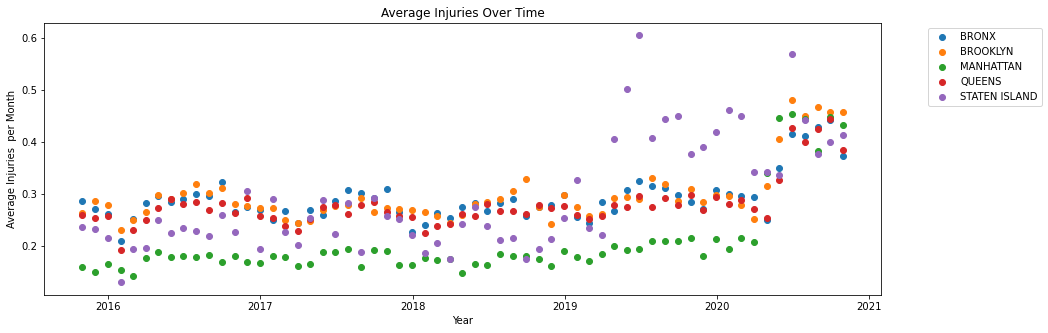

In [54]:
fig = plt.figure(figsize=(15, 5))
for key in keys:
    # Look up group by key
    b_df = groups.get_group(key)
    
    sub = b_df[['CRASH DATE', 'NUMBER OF PERSONS INJURED']]
    injuries = sub.groupby(pd.Grouper(key='CRASH DATE', freq='M')).mean()
    
    plt.scatter(injuries.index , injuries, label = key)
    plt.ylabel('Average Injuries  per Month')
    plt.xlabel('Year')
    plt.title('Average Injuries Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');


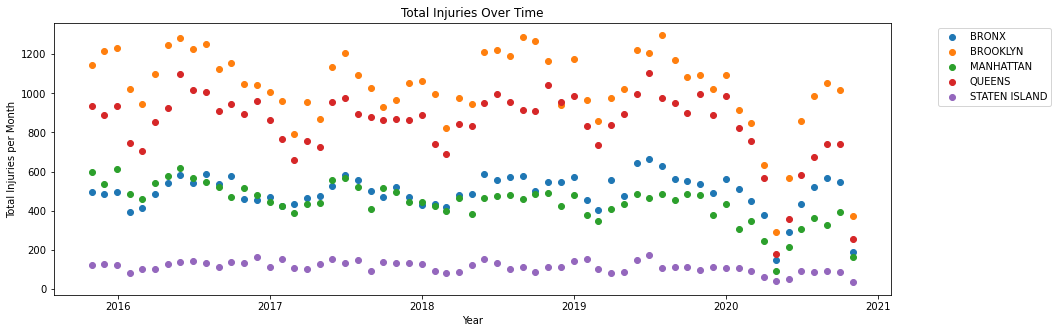

In [53]:
fig = plt.figure(figsize=(15, 5))
for key in keys:
    # Look up group by key
    b_df = groups.get_group(key)
    
    sub = b_df[['CRASH DATE', 'NUMBER OF PERSONS INJURED']]
    injuries = sub.groupby(pd.Grouper(key='CRASH DATE', freq='M')).sum()
    
    plt.scatter(injuries.index , injuries, label = key)
    plt.ylabel('Total Injuries per Month')
    plt.xlabel('Year')
    plt.title('Total Injuries Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

    


In [22]:
gt = sub.groupby(pd.Grouper(key='CRASH DATE', freq='M')).sum()

In [25]:
gt

,NUMBER OF PERSONS INJURED
CRASH DATE,
2015-10-31,124.0
2015-11-30,130.0
2015-12-31,125.0
2016-01-31,80.0
2016-02-29,101.0
...,...
2020-06-30,91.0
2020-07-31,88.0
2020-08-31,94.0


In [66]:
df.loc[(df['NUMBER OF PERSONS KILLED'] > 0)]['NUMBER OF PERSONS KILLED']

1089      1.0
1244      1.0
1476      1.0
2221      1.0
2720      1.0
         ... 
680484    1.0
681150    1.0
681244    1.0
682353    1.0
682776    2.0
Name: NUMBER OF PERSONS KILLED, Length: 686, dtype: float64